#### 1030516766 - Sergen Pekşen - Machine Learning Final Assignment

In [1]:
# kod içerisindeki açıklamaları daha iyi vurgulayabilmek için yardımcı bir kütüphane
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
    

import pandas as pd
from sklearn.preprocessing import LabelEncoder, normalize
from sklearn.utils import shuffle

features = pd.read_csv("data.csv")
# we dont need the sample column delete it
del features['Unnamed: 0']
labels = pd.read_csv("labels.csv")["disease_type"]

In [2]:
from sklearn import preprocessing
# Split the data into test ant train
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(features, 
                                                    labels, test_size=0.2, random_state = 5,
                                                    stratify=labels)

# scale the data
X_train, X_test = preprocessing.scale(X_train), preprocessing.scale(X_test)

In [3]:
from sklearn.neural_network import MLPClassifier

model_params = [
    {
        "solver" : "lbfgs",
        "activation" : "identity",
        "alpha" : 0.1,
        "hidden_layer_sizes" : (5, 2)
    },
    {
        "solver" : "lbfgs",
        "activation" : "logistic",
        "alpha" : 0.1,
        "hidden_layer_sizes" : (5, 2)
    },
    {
        "solver" : "lbfgs", 
        "activation" : "tanh",
        "alpha" : 0.1,
        "hidden_layer_sizes" : (5, 2)
    },
    {
        "solver" : "lbfgs",
        "activation" : "relu",
        "alpha" : 0.1,
        "hidden_layer_sizes" : (5, 2)
    }
]
printmd("## Öncelikle modellerde, diğer her şeyi sabit alarak sadece aktivasyon fonksiyonlarını değiştirdik")

classifiers = []

for params in model_params:
    clf = MLPClassifier(**params, max_iter = 500000, random_state = 1)
    classifiers.append(clf.fit(X_train, Y_train))

## Öncelikle modellerde, diğer her şeyi sabit alarak sadece aktivasyon fonksiyonlarını değiştirdik


### Model parametrelerindeki aktivasyon fonksiyonları nelerdir?

**‘identity’**, no-op activation, useful to implement linear bottleneck, returns f(x) = x

**‘logistic’**, the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).

**‘tanh’**, the hyperbolic tan function, returns f(x) = tanh(x).

**‘relu’**, the rectified linear unit function, returns f(x) = max(0, x)

_sklearn kütüphanesindeki classification_report fonksiyonu "Sensitivity" yi "recall" olarak verdiği için, "Sensitivity" ayrıca eklenmemiştir_

## Bu model için seçili parametreler:

### {'solver': 'lbfgs', 'activation': 'identity', 'alpha': 0.1, 'hidden_layer_sizes': (5, 2)}

                  precision    recall  f1-score   support

   breast cancer       0.77      0.95      0.85        21
    colon cancer       0.95      0.82      0.88        22
     lung cancer       1.00      0.25      0.40         4
prosrtate cancer       0.88      0.92      0.90        24

        accuracy                           0.86        71
       macro avg       0.90      0.73      0.76        71
    weighted avg       0.87      0.86      0.85        71

             breast cancer  colon cancer  lung cancer  prosrtate cancer
Specificity           0.88      0.979592          1.0           0.93617 

           breast cancer  colon cancer  lung cancer  prosrtate cancer
F2 Scores       1.877732      1.799292     1.078125          1.919474


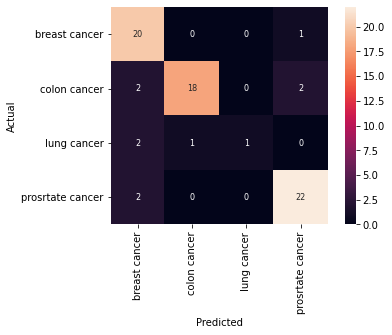

## Bu model için seçili parametreler:

### {'solver': 'lbfgs', 'activation': 'logistic', 'alpha': 0.1, 'hidden_layer_sizes': (5, 2)}

                  precision    recall  f1-score   support

   breast cancer       0.87      0.95      0.91        21
    colon cancer       0.95      0.86      0.90        22
     lung cancer       0.50      0.25      0.33         4
prosrtate cancer       0.92      1.00      0.96        24

        accuracy                           0.90        71
       macro avg       0.81      0.77      0.78        71
    weighted avg       0.89      0.90      0.89        71

             breast cancer  colon cancer  lung cancer  prosrtate cancer
Specificity           0.94      0.979592     0.985075          0.957447 

           breast cancer  colon cancer  lung cancer  prosrtate cancer
F2 Scores        2.00576      1.892899     1.062034          2.154255


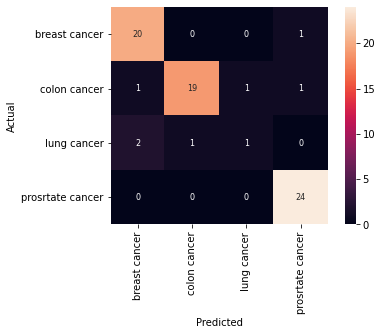

## Bu model için seçili parametreler:

### {'solver': 'lbfgs', 'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (5, 2)}

                  precision    recall  f1-score   support

   breast cancer       0.83      0.95      0.89        21
    colon cancer       1.00      0.91      0.95        22
     lung cancer       0.67      0.50      0.57         4
prosrtate cancer       0.96      0.96      0.96        24

        accuracy                           0.92        71
       macro avg       0.86      0.83      0.84        71
    weighted avg       0.92      0.92      0.91        71

             breast cancer  colon cancer  lung cancer  prosrtate cancer
Specificity           0.92           1.0     0.985075          0.978723 

           breast cancer  colon cancer  lung cancer  prosrtate cancer
F2 Scores       1.963084      2.033058      1.29291          2.102301


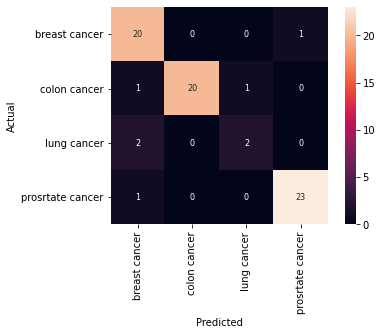

## Bu model için seçili parametreler:

### {'solver': 'lbfgs', 'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (5, 2)}

                  precision    recall  f1-score   support

   breast cancer       0.59      0.90      0.72        21
    colon cancer       0.89      0.73      0.80        22
     lung cancer       1.00      0.25      0.40         4
prosrtate cancer       1.00      0.83      0.91        24

        accuracy                           0.79        71
       macro avg       0.87      0.68      0.71        71
    weighted avg       0.85      0.79      0.79        71

             breast cancer  colon cancer  lung cancer  prosrtate cancer
Specificity           0.74      0.959184          1.0               1.0 

           breast cancer  colon cancer  lung cancer  prosrtate cancer
F2 Scores         1.4972      1.593355     1.078125          1.868056


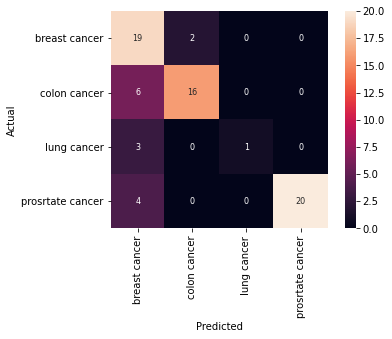

In [4]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
    
def show_report_for_model(model):
    prediction = model.predict(X_test)
    score = 0
    for k, i in enumerate(Y_test):
        if i == prediction[k]:
            score += 1
    percentage = score/len(prediction) * 100
    # confusion matriximiz nedir?

    confusion_matrix = metrics.confusion_matrix(Y_test, prediction)
    unique_labels = np.sort(pd.unique(labels))
    df_cm = pd.DataFrame(confusion_matrix, unique_labels, unique_labels)

    # classification raporunu yaz
    print(metrics.classification_report(Y_test, prediction))

    FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
    FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
    TP = np.diag(confusion_matrix)
    TN = confusion_matrix.sum() - (FP + FN + TP)

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP)

    F2_scores = (5*TPR*TNR)/4*TPR+TNR

    specificity_df = pd.DataFrame(TNR, unique_labels).T.rename({0 : "Specificity"})
    print(specificity_df, "\n")
    f2_score_df = pd.DataFrame(F2_scores, unique_labels).T.rename({0 : "F2 Scores"})
    print(f2_score_df)

    # dataframeyi çiz
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    sn.heatmap(df_cm, annot=True,annot_kws={"size": 8}, square=True, fmt='g')
    plt.show()


for index, model in enumerate(classifiers):
    printmd("## Bu model için seçili parametreler:")
    printmd(f"### {model_params[index]}")
    show_report_for_model(model)
 

In [5]:
model_params = [
    {
        "solver" : "lbfgs",
        "activation" : "tanh",
        "alpha" : 0.1,
        "hidden_layer_sizes" : (4, 2)
    },
    {
        "solver" : "lbfgs",
        "activation" : "tanh",
        "alpha" : 0.1,
        "hidden_layer_sizes" : (8, 3)
    },
    {
        "solver" : "lbfgs", 
        "activation" : "tanh",
        "alpha" : 0.1,
        "hidden_layer_sizes" : (6, 2, 1)
    },
    {
        "solver" : "lbfgs",
        "activation" : "tanh",
        "alpha" : 0.1,
        "hidden_layer_sizes" : (10, 4)
    },
    {
        "solver" : "lbfgs",
        "activation" : "tanh",
        "alpha" : 0.1,
        "hidden_layer_sizes" : (60, 10)
    },
    {
        "solver" : "lbfgs",
        "activation" : "tanh",
        "alpha" : 0.1,
        "hidden_layer_sizes" : (100,)
    }
]
printmd("## Şimdiki modellerde, diğer her şeyi sabit tutarak sadece hidden layer size parametresini değiştirdik")

classifiers = []

for params in model_params:
    clf = MLPClassifier(**params, max_iter = 500000, random_state = 1)
    classifiers.append(clf.fit(X_train, Y_train))

## Şimdiki modellerde, diğer her şeyi sabit tutarak sadece hidden layer size parametresini değiştirdik

## Bu model için seçili parametreler:

### {'solver': 'lbfgs', 'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (4, 2)}

                  precision    recall  f1-score   support

   breast cancer       0.95      0.90      0.93        21
    colon cancer       1.00      0.86      0.93        22
     lung cancer       0.50      0.50      0.50         4
prosrtate cancer       0.86      1.00      0.92        24

        accuracy                           0.90        71
       macro avg       0.83      0.82      0.82        71
    weighted avg       0.91      0.90      0.90        71

             breast cancer  colon cancer  lung cancer  prosrtate cancer
Specificity           0.98           1.0     0.970149          0.914894 

           breast cancer  colon cancer  lung cancer  prosrtate cancer
F2 Scores       1.982778      1.932335     1.273321          2.058511


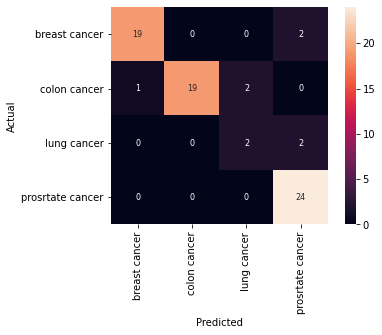

## Bu model için seçili parametreler:

### {'solver': 'lbfgs', 'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (8, 3)}

                  precision    recall  f1-score   support

   breast cancer       0.95      0.95      0.95        21
    colon cancer       1.00      0.95      0.98        22
     lung cancer       1.00      0.50      0.67         4
prosrtate cancer       0.89      1.00      0.94        24

        accuracy                           0.94        71
       macro avg       0.96      0.85      0.88        71
    weighted avg       0.95      0.94      0.94        71

             breast cancer  colon cancer  lung cancer  prosrtate cancer
Specificity           0.98           1.0          1.0           0.93617 

           breast cancer  colon cancer  lung cancer  prosrtate cancer
F2 Scores       2.091111      2.138946       1.3125          2.106383


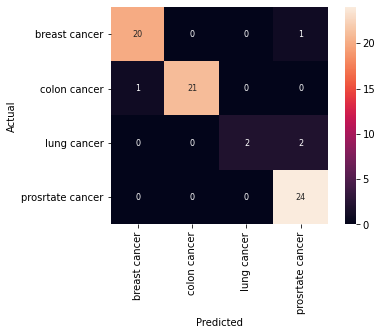

## Bu model için seçili parametreler:

### {'solver': 'lbfgs', 'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (6, 2, 1)}

c:\users\sergen\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                  precision    recall  f1-score   support

   breast cancer       0.74      0.95      0.83        21
    colon cancer       0.51      0.95      0.67        22
     lung cancer       0.33      0.25      0.29         4
prosrtate cancer       0.00      0.00      0.00        24

        accuracy                           0.59        71
       macro avg       0.40      0.54      0.45        71
    weighted avg       0.40      0.59      0.47        71

             breast cancer  colon cancer  lung cancer  prosrtate cancer
Specificity           0.86      0.591837     0.970149               1.0 

           breast cancer  colon cancer  lung cancer  prosrtate cancer
F2 Scores       1.835057      1.265907     1.045942               1.0


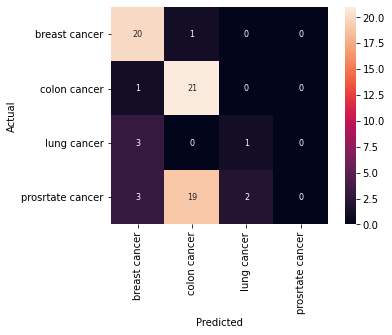

## Bu model için seçili parametreler:

### {'solver': 'lbfgs', 'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (10, 4)}

                  precision    recall  f1-score   support

   breast cancer       0.95      0.95      0.95        21
    colon cancer       1.00      0.91      0.95        22
     lung cancer       1.00      1.00      1.00         4
prosrtate cancer       0.92      1.00      0.96        24

        accuracy                           0.96        71
       macro avg       0.97      0.97      0.97        71
    weighted avg       0.96      0.96      0.96        71

             breast cancer  colon cancer  lung cancer  prosrtate cancer
Specificity           0.98           1.0          1.0          0.957447 

           breast cancer  colon cancer  lung cancer  prosrtate cancer
F2 Scores       2.091111      2.033058         2.25          2.154255


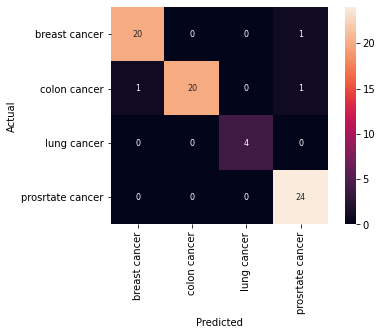

## Bu model için seçili parametreler:

### {'solver': 'lbfgs', 'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (60, 10)}

                  precision    recall  f1-score   support

   breast cancer       0.95      0.95      0.95        21
    colon cancer       1.00      0.95      0.98        22
     lung cancer       1.00      1.00      1.00         4
prosrtate cancer       0.96      1.00      0.98        24

        accuracy                           0.97        71
       macro avg       0.98      0.98      0.98        71
    weighted avg       0.97      0.97      0.97        71

             breast cancer  colon cancer  lung cancer  prosrtate cancer
Specificity           0.98           1.0          1.0          0.978723 

           breast cancer  colon cancer  lung cancer  prosrtate cancer
F2 Scores       2.091111      2.138946         2.25          2.202128


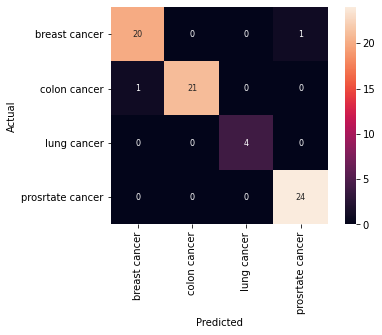

## Bu model için seçili parametreler:

### {'solver': 'lbfgs', 'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (100,)}

                  precision    recall  f1-score   support

   breast cancer       0.95      0.95      0.95        21
    colon cancer       1.00      0.95      0.98        22
     lung cancer       1.00      1.00      1.00         4
prosrtate cancer       0.96      1.00      0.98        24

        accuracy                           0.97        71
       macro avg       0.98      0.98      0.98        71
    weighted avg       0.97      0.97      0.97        71

             breast cancer  colon cancer  lung cancer  prosrtate cancer
Specificity           0.98           1.0          1.0          0.978723 

           breast cancer  colon cancer  lung cancer  prosrtate cancer
F2 Scores       2.091111      2.138946         2.25          2.202128


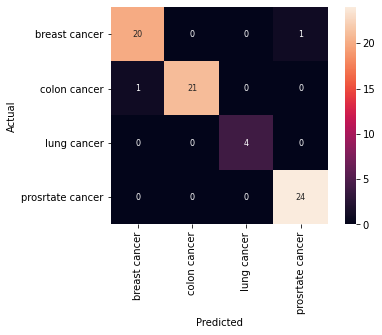

In [6]:
for index, model in enumerate(classifiers):
    printmd("## Bu model için seçili parametreler:")
    printmd(f"### {model_params[index]}")
    show_report_for_model(model)

Hidden layer size 2 katman ve katmanlardaki nöron sayısı yüksek olursa "accuracy" ve "recall" skorları yükseldiği görülüyor.

### Solver parametrelerinin açıklamaları

The solver for weight optimization.

**‘lbfgs’** is an optimizer in the family of quasi-Newton methods.

**‘sgd’** refers to stochastic gradient descent.

**‘adam’** refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba

In [7]:
model_params = [
    {
        "solver" : "sgd",
        "activation" : "relu",
        "alpha" : 0.1,
        "hidden_layer_sizes" : (60, 10)
    },
    {
        "solver" : "lbfgs",
        "activation" : "relu",
        "alpha" : 0.1,
        "hidden_layer_sizes" : (60, 10)
    },
    {
        "solver" : "adam", 
        "activation" : "relu",
        "alpha" : 0.1,
        "hidden_layer_sizes" : (60, 10)
    },
]
classifiers = []
for params in model_params:
    clf = MLPClassifier(**params, max_iter = 500000, random_state = 1)
    classifiers.append(clf.fit(X_train, Y_train))

## Bu model için seçili parametreler:

### {'solver': 'sgd', 'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (60, 10)}

                  precision    recall  f1-score   support

   breast cancer       0.95      0.95      0.95        21
    colon cancer       1.00      0.91      0.95        22
     lung cancer       0.67      1.00      0.80         4
prosrtate cancer       0.96      0.96      0.96        24

        accuracy                           0.94        71
       macro avg       0.89      0.95      0.92        71
    weighted avg       0.95      0.94      0.95        71

             breast cancer  colon cancer  lung cancer  prosrtate cancer
Specificity           0.98           1.0     0.970149          0.978723 

           breast cancer  colon cancer  lung cancer  prosrtate cancer
F2 Scores       2.091111      2.033058     2.182836          2.102301


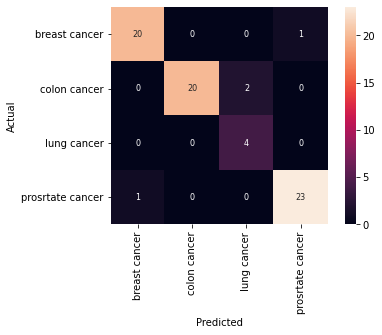

## Bu model için seçili parametreler:

### {'solver': 'lbfgs', 'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (60, 10)}

                  precision    recall  f1-score   support

   breast cancer       1.00      0.95      0.98        21
    colon cancer       1.00      1.00      1.00        22
     lung cancer       1.00      1.00      1.00         4
prosrtate cancer       0.96      1.00      0.98        24

        accuracy                           0.99        71
       macro avg       0.99      0.99      0.99        71
    weighted avg       0.99      0.99      0.99        71

             breast cancer  colon cancer  lung cancer  prosrtate cancer
Specificity            1.0           1.0          1.0          0.978723 

           breast cancer  colon cancer  lung cancer  prosrtate cancer
F2 Scores       2.133787          2.25         2.25          2.202128


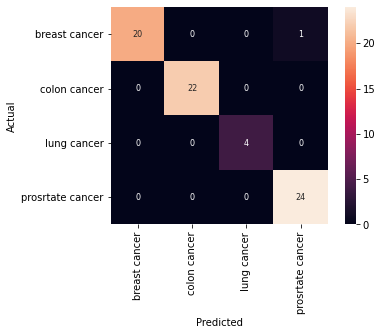

## Bu model için seçili parametreler:

### {'solver': 'adam', 'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (60, 10)}

                  precision    recall  f1-score   support

   breast cancer       1.00      0.95      0.98        21
    colon cancer       1.00      0.91      0.95        22
     lung cancer       0.60      0.75      0.67         4
prosrtate cancer       0.92      1.00      0.96        24

        accuracy                           0.94        71
       macro avg       0.88      0.90      0.89        71
    weighted avg       0.95      0.94      0.95        71

             breast cancer  colon cancer  lung cancer  prosrtate cancer
Specificity            1.0           1.0     0.970149          0.957447 

           breast cancer  colon cancer  lung cancer  prosrtate cancer
F2 Scores       2.133787      2.033058     1.652285          2.154255


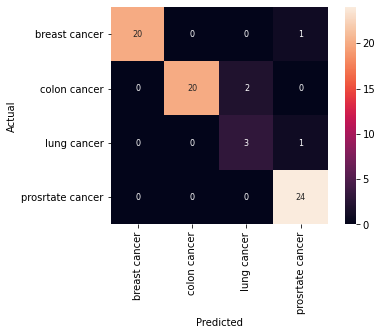

In [8]:
for index, model in enumerate(classifiers):
    printmd("## Bu model için seçili parametreler:")
    printmd(f"### {model_params[index]}")
    show_report_for_model(model)
 

lbfgs(Limited-memory BFGS) en iyi sonuçları veriyor gibi gözüküyor. **Adım büyüklüğünü** 0.05 ve 0.001 alarak tekrar deneyelim.

In [9]:
model_params = [
    {
        "solver" : "sgd",
        "activation" : "relu",
        "alpha" : 0.05,
        "hidden_layer_sizes" : (60, 10)
    },
    {
        "solver" : "lbfgs",
        "activation" : "relu",
        "alpha" : 0.05,
        "hidden_layer_sizes" : (60, 10)
    },
    {
        "solver" : "adam", 
        "activation" : "relu",
        "alpha" : 0.05,
        "hidden_layer_sizes" : (60, 10)
    },
    
    {
        "solver" : "sgd",
        "activation" : "relu",
        "alpha" : 0.001,
        "hidden_layer_sizes" : (60, 10)
    },
    {
        "solver" : "lbfgs",
        "activation" : "relu",
        "alpha" : 0.001,
        "hidden_layer_sizes" : (60, 10)
    },
    {
        "solver" : "adam", 
        "activation" : "relu",
        "alpha" : 0.001,
        "hidden_layer_sizes" : (60, 10)
    },
]
classifiers = []
for params in model_params:
    clf = MLPClassifier(**params, max_iter = 500000, random_state = 1)
    classifiers.append(clf.fit(X_train, Y_train))

## Bu model için seçili parametreler:

### {'solver': 'sgd', 'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (60, 10)}

                  precision    recall  f1-score   support

   breast cancer       0.95      0.95      0.95        21
    colon cancer       1.00      0.91      0.95        22
     lung cancer       0.67      1.00      0.80         4
prosrtate cancer       0.96      0.96      0.96        24

        accuracy                           0.94        71
       macro avg       0.89      0.95      0.92        71
    weighted avg       0.95      0.94      0.95        71

             breast cancer  colon cancer  lung cancer  prosrtate cancer
Specificity           0.98           1.0     0.970149          0.978723 

           breast cancer  colon cancer  lung cancer  prosrtate cancer
F2 Scores       2.091111      2.033058     2.182836          2.102301


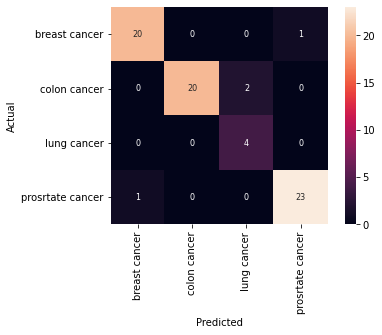

## Bu model için seçili parametreler:

### {'solver': 'lbfgs', 'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (60, 10)}

                  precision    recall  f1-score   support

   breast cancer       1.00      0.95      0.98        21
    colon cancer       1.00      1.00      1.00        22
     lung cancer       1.00      0.75      0.86         4
prosrtate cancer       0.92      1.00      0.96        24

        accuracy                           0.97        71
       macro avg       0.98      0.93      0.95        71
    weighted avg       0.97      0.97      0.97        71

             breast cancer  colon cancer  lung cancer  prosrtate cancer
Specificity            1.0           1.0          1.0          0.957447 

           breast cancer  colon cancer  lung cancer  prosrtate cancer
F2 Scores       2.133787          2.25     1.703125          2.154255


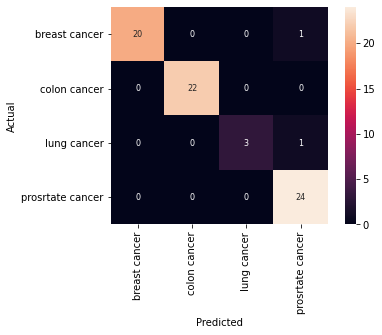

## Bu model için seçili parametreler:

### {'solver': 'adam', 'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (60, 10)}

                  precision    recall  f1-score   support

   breast cancer       1.00      0.95      0.98        21
    colon cancer       1.00      0.91      0.95        22
     lung cancer       0.60      0.75      0.67         4
prosrtate cancer       0.92      1.00      0.96        24

        accuracy                           0.94        71
       macro avg       0.88      0.90      0.89        71
    weighted avg       0.95      0.94      0.95        71

             breast cancer  colon cancer  lung cancer  prosrtate cancer
Specificity            1.0           1.0     0.970149          0.957447 

           breast cancer  colon cancer  lung cancer  prosrtate cancer
F2 Scores       2.133787      2.033058     1.652285          2.154255


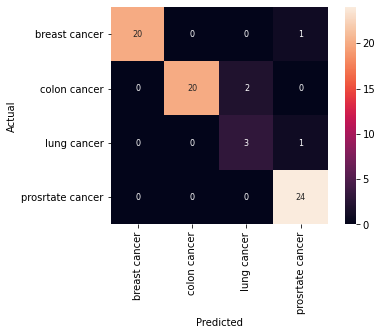

## Bu model için seçili parametreler:

### {'solver': 'sgd', 'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (60, 10)}

                  precision    recall  f1-score   support

   breast cancer       0.95      0.95      0.95        21
    colon cancer       1.00      0.91      0.95        22
     lung cancer       0.67      1.00      0.80         4
prosrtate cancer       0.96      0.96      0.96        24

        accuracy                           0.94        71
       macro avg       0.89      0.95      0.92        71
    weighted avg       0.95      0.94      0.95        71

             breast cancer  colon cancer  lung cancer  prosrtate cancer
Specificity           0.98           1.0     0.970149          0.978723 

           breast cancer  colon cancer  lung cancer  prosrtate cancer
F2 Scores       2.091111      2.033058     2.182836          2.102301


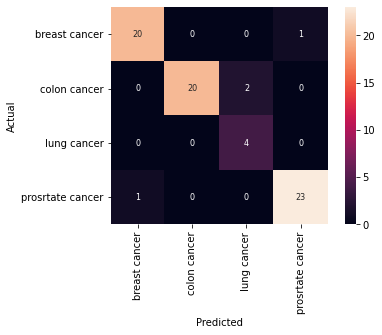

## Bu model için seçili parametreler:

### {'solver': 'lbfgs', 'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (60, 10)}

                  precision    recall  f1-score   support

   breast cancer       1.00      0.95      0.98        21
    colon cancer       1.00      0.82      0.90        22
     lung cancer       0.57      1.00      0.73         4
prosrtate cancer       0.92      1.00      0.96        24

        accuracy                           0.93        71
       macro avg       0.87      0.94      0.89        71
    weighted avg       0.95      0.93      0.93        71

             breast cancer  colon cancer  lung cancer  prosrtate cancer
Specificity            1.0           1.0     0.955224          0.957447 

           breast cancer  colon cancer  lung cancer  prosrtate cancer
F2 Scores       2.133787      1.836777     2.149254          2.154255


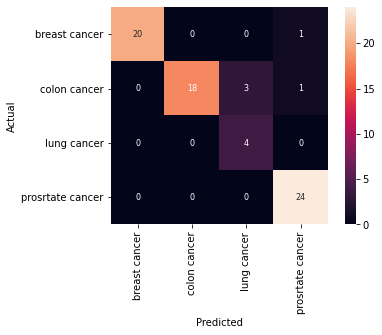

## Bu model için seçili parametreler:

### {'solver': 'adam', 'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (60, 10)}

                  precision    recall  f1-score   support

   breast cancer       1.00      0.95      0.98        21
    colon cancer       1.00      0.91      0.95        22
     lung cancer       0.60      0.75      0.67         4
prosrtate cancer       0.92      1.00      0.96        24

        accuracy                           0.94        71
       macro avg       0.88      0.90      0.89        71
    weighted avg       0.95      0.94      0.95        71

             breast cancer  colon cancer  lung cancer  prosrtate cancer
Specificity            1.0           1.0     0.970149          0.957447 

           breast cancer  colon cancer  lung cancer  prosrtate cancer
F2 Scores       2.133787      2.033058     1.652285          2.154255


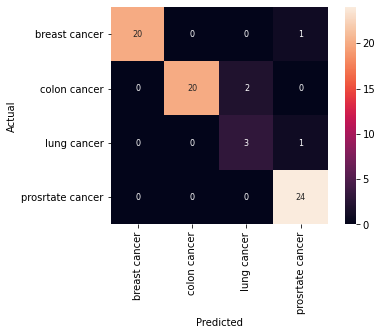

In [10]:
for index, model in enumerate(classifiers):
    printmd("## Bu model için seçili parametreler:")
    printmd(f"### {model_params[index]}")
    show_report_for_model(model)

En iyi sonucu veren Sinir Ağının sahip olduğu parametrelerinin şu şekilde olduğu görülmüştür:

```{'solver': 'lbfgs', 'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (60, 10)```